# Q2

In [1]:
import cv2 # just for reading the image
import numpy as np
import matplotlib.pyplot as plt

read image "q2.png"

In [2]:
img = "/content/q2.png"

plot the image

array([[[240, 230, 238],
        [229, 238, 233],
        [243, 237, 241],
        ...,
        [244, 235, 238],
        [233, 233, 225],
        [231, 230, 225]],

       [[244, 235, 238],
        [245, 246, 248],
        [246, 240, 244],
        ...,
        [245, 240, 244],
        [247, 240, 247],
        [244, 243, 241]],

       [[246, 235, 243],
        [240, 242, 241],
        [248, 242, 242],
        ...,
        [243, 237, 237],
        [240, 235, 239],
        [238, 237, 235]],

       ...,

       [[231, 226, 233],
        [228, 222, 232],
        [230, 224, 234],
        ...,
        [244, 234, 242],
        [240, 234, 238],
        [240, 235, 239]],

       [[227, 226, 232],
        [225, 222, 229],
        [226, 223, 232],
        ...,
        [240, 233, 240],
        [240, 233, 240],
        [242, 237, 243]],

       [[227, 224, 231],
        [224, 221, 228],
        [227, 224, 233],
        ...,
        [242, 235, 242],
        [241, 236, 242],
        [240, 238, 243]]], dtype=uint8)
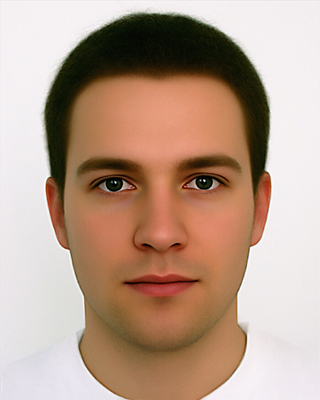

In [3]:
img = cv2.imread(img)
# Convert to RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img

In [4]:
def get_neighbors(point, shape, neighbor_mode):
    neighbors = []
    x, y = point
    if neighbor_mode == 0:  # 4-connectivity
        deltas = [(-1, 0), (1, 0), (0, -1), (0, 1)]
    else:  # 8-connectivity
        deltas = [(-1, 0), (1, 0), (0, -1), (0, 1), (-1, -1), (-1, 1), (1, -1), (1, 1)]

    for dx, dy in deltas:
        nx, ny = x + dx, y + dy
        if 0 <= nx < shape[0] and 0 <= ny < shape[1]:
            neighbors.append((nx, ny))

    return neighbors

In [5]:
def segment(image,seed_point,threshold,neighbor_mode=0):
    segmented_image = image.copy()
    ### neighbor_mode=0 => 4-connectivity
    ### neighbor_mode=1 => 8-connectivity
    ### your implementation
    ###
    visited = np.zeros(image.shape[:2], dtype=bool)
    to_visit = [seed_point]
    initial_color = image[seed_point[0], seed_point[1]]

    while to_visit:
        x, y = to_visit.pop(0)
        if visited[x, y]:
            continue

        current_color = image[x, y]
        if np.linalg.norm(initial_color - current_color) <= threshold:
            segmented_image[x, y] = [255, 0, 0]  # Change to red color for segmentation
            visited[x, y] = True
            neighbors = get_neighbors((x, y), image.shape[:2], neighbor_mode)
            to_visit.extend(neighbors)

    return segmented_image

    return segmented_image

In [39]:
seed_point= (110, 170)
threshold= 130

In [40]:
segmented_image_4 = segment(img,seed_point,threshold)
segmented_image_8 = segment(img,seed_point,threshold,1)

plot the results and compare them

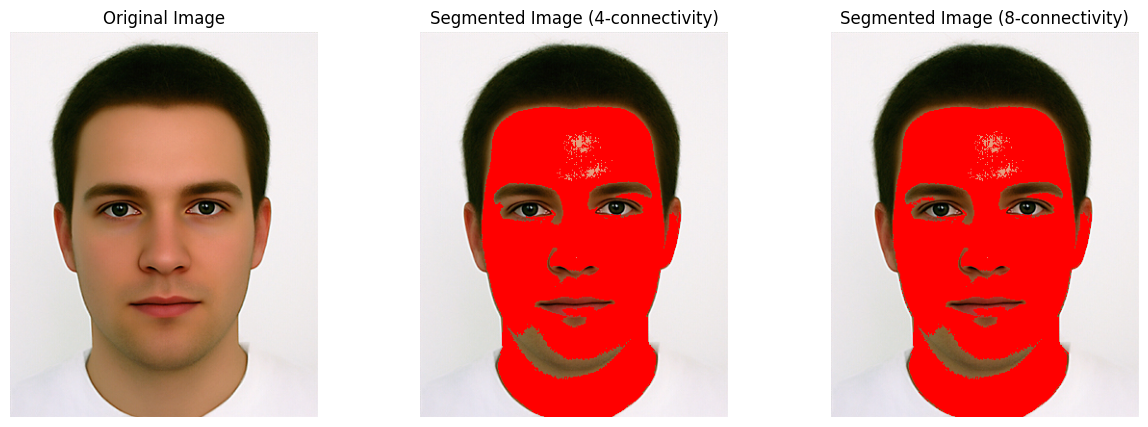

In [41]:
# Plot the original and segmented images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].imshow(img)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(segmented_image_4)
axes[1].set_title("Segmented Image (4-connectivity)")
axes[1].axis('off')

axes[2].imshow(segmented_image_8)
axes[2].set_title("Segmented Image (8-connectivity)")
axes[2].axis('off')

plt.show()